<a href="https://colab.research.google.com/github/HoaiNam52/NguyenHoaiNam_19146219_BT_AI/blob/main/Tiente_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Money/training_data',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical',
                                               subset = 'training',
                                               shuffle = True)
validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Money/training_data',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical',
                                               subset = 'validation',
                                               shuffle = True)
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Money/testing_data',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 1122 images belonging to 11 classes.
Found 275 images belonging to 11 classes.
Found 0 images belonging to 0 classes.


In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(256,256,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(training_set,batch_size=128,epochs=10,verbose=1,validation_data=validation_set)

Epoch 1/10
36/36 [==============================] - 403s 11s/step - loss: 9.3639 - accuracy: 0.4929 - val_loss: 0.3645 - val_accuracy: 0.8909
Epoch 2/10
36/36 [==============================] - 389s 11s/step - loss: 0.2647 - accuracy: 0.9314 - val_loss: 0.3244 - val_accuracy: 0.9527
Epoch 3/10
36/36 [==============================] - 387s 11s/step - loss: 0.1165 - accuracy: 0.9679 - val_loss: 0.1731 - val_accuracy: 0.9418
Epoch 4/10
36/36 [==============================] - 382s 11s/step - loss: 0.0437 - accuracy: 0.9848 - val_loss: 0.1544 - val_accuracy: 0.9709
Epoch 5/10
36/36 [==============================] - 386s 11s/step - loss: 0.1232 - accuracy: 0.9715 - val_loss: 0.1022 - val_accuracy: 0.9709
Epoch 6/10
36/36 [==============================] - 386s 11s/step - loss: 0.1340 - accuracy: 0.9715 - val_loss: 0.1508 - val_accuracy: 0.9709
Epoch 7/10
36/36 [==============================] - 387s 11s/step - loss: 0.0238 - accuracy: 0.9947 - val_loss: 0.1466 - val_accuracy: 0.9709
Epoch 

In [22]:
model.save("Tiente_CNN.h5")

In [23]:
training_set.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200d': 3,
 '200k': 4,
 '20k': 5,
 '2k': 6,
 '500d': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

In [24]:
label = ['100k', '10k', '1k', '200d', '200k', '20k', '2k', '500d', '500k', '50k', '5k']

50k


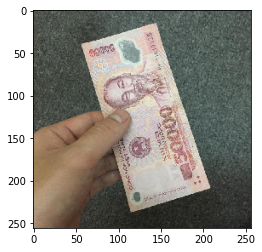

In [28]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('50k.jpg', target_size = (256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])